In [1]:
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import os
import seaborn as sns

denRadius = pd.read_csv('../final_data/denRadius.csv', sep=',', index_col=0)
denRadius

,denRadius
swc_id,
17109_1701_x8048_y22277,119.125794
17109_1801_x6698_y12550,135.610506
17109_1901_x9602_y10508,135.098438
17109_2201_x8046_y23301,141.924331
17109_2301_x8535_y23051,159.620525
...,...
pre_18866_00186,257.409706
pre_18866_00299,259.475274
pre_18866_01458,352.579915


In [3]:
if not os.path.exists(
        r'D:\2022\whole_brain_con\final_data\connectivity_results\Allen_Janelia_re10um_single_cell_level_result_z_unfilpped.pickle'):
    src = r'D:\2022\whole_brain_con\final_data\connectivity_results\Allen_Janelia_re10um_single_cell_level_result_z_unfilpped'
    file_list = os.listdir(src)
    not_list = []
    result_dict = {}
    for file in tqdm(file_list):
        path_file = src + '\\' + file
        with open(path_file, 'rb') as f:
            tmp = pickle.load(f)

#         cur_result = []
#         for tmp_i in tmp:
#             axon_id = tmp_i[-2]
#             den_id = tmp_i[-1]
#             a2d_dis = tmp_i[0]
#             a2d_adj_dis = tmp_i[1]
#             numAxonNodes = tmp_i[2]

#             cur_result.append(
#                 [a2d_dis.mean(),
#                  a2d_dis[cur_index].mean() if len(cur_index)>0 else -1,
#                  axon_id,
#                  den_id])
#         result_dict[file] = cur_result
        result_dict[file] = tmp
    with open(
            r'D:\2022\whole_brain_con\final_data\connectivity_results\Allen_Janelia_re10um_single_cell_level_result_z_unfilpped.pickle',
            'wb') as f:
        pickle.dump(result_dict, f)
else:
    with open(
            r'D:\2022\whole_brain_con\final_data\connectivity_results\Allen_Janelia_re10um_single_cell_level_result_z_unfilpped.pickle',
            'rb') as f:
        result_dict = pickle.load(f)


In [4]:
result_dict['17109_1701_x8048_y22277.pickle']

[[2513.282,
  24.462,
  22,
  '17109_1701_x8048_y22277.swc',
  '17109_1801_x6698_y12550.swc'],
 [3416.852,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_1901_x9602_y10508.swc'],
 [2219.285,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_2201_x8046_y23301.swc'],
 [2232.285,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_2301_x8535_y23051.swc'],
 [2525.873,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_2301_x9418_y23665.swc'],
 [2597.735,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_2401_x8977_y24184.swc'],
 [2554.106,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_2401_x9338_y2394.swc'],
 [3602.665,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_2401_x9695_y9693.swc'],
 [3877.52, -1, 0, '17109_1701_x8048_y22277.swc', '17109_2401_x9954_y9122.swc'],
 [3771.688,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_2500_x9864_y9311.swc'],
 [4044.555,
  -1,
  0,
  '17109_1701_x8048_y22277.swc',
  '17109_2601_x10213_y8783.swc'],
 [2865.972,
  -1,


In [5]:
sele_index = [i.split('.')[0] for i in result_dict.keys()]
tmp_list1 = result_dict[sele_index[0] + '.pickle']
sele_column = [j.split('.')[0] for j in list(set([i[-1] for i in tmp_list1] + [tmp_list1[0][-2]]))]
type_dict = {0: 'mean', 1: 'mean.adj', 2:'numAxonNods'}
result_dataframe_dict = {}


In [6]:
for k, v in type_dict.items():
    tmp_result_df = None
    for axon_id, tmp_dataset in result_dict.items():
        values_list = []
        column_list = []
        for tmp_data in tmp_dataset:
            values_list.append(tmp_data[k])
            column_list.append(tmp_data[-1].split('.')[0])
        if axon_id.split('.')[0] not in column_list:
            values_list.append(-2)
            column_list.append(axon_id.split('.')[0])
        tmp_df = pd.DataFrame(np.array(values_list).reshape(1, -1), columns=column_list, index=[axon_id])[sele_column]
        if tmp_result_df is None:
            tmp_result_df = tmp_df
        else:
            tmp_result_df = pd.concat([tmp_result_df, tmp_df], axis=0)
    result_dataframe_dict[v] = tmp_result_df


In [7]:
with open(r'D:\2022\whole_brain_con\final_data\connectivity_results\Allen_Janelia_re10um_single_cell_level_summaryz_unfilpped.pickle', 'wb') as f:
    pickle.dump(result_dataframe_dict,f)


In [13]:
result_dataframe_dict['numAxonNods']

,18454_00111,18455_00121,AA0264,18453_3186_x12745_y7108,18457_00141,pre_18464_00077,18453_7132_x31679_y7308,18458_00450,18465_00349,AA0663,...,AA0755,AA0329,AA0517,191807_2469_x5431_y10056,AA0783,18454_00096,17545_00030,191812_3140_x5204_y12992,AA0652,18454_01114
17109_1701_x8048_y22277.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,0,0,0,94,0,0
17109_1801_x6698_y12550.pickle,0,0,0,0,0,0,0,0,0,5,...,0,0,0,36,42,0,0,0,56,0
17109_1901_x9602_y10508.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,61,0,0,0,0,0,0
17109_2201_x8046_y23301.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17109_2301_x8535_y23051.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pre_18866_00186.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pre_18866_00299.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pre_18866_01458.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pre_18868_00443.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
madj = result_dataframe_dict['numAxonNods'].copy()
madj

,18454_00111,18455_00121,AA0264,18453_3186_x12745_y7108,18457_00141,pre_18464_00077,18453_7132_x31679_y7308,18458_00450,18465_00349,AA0663,...,AA0755,AA0329,AA0517,191807_2469_x5431_y10056,AA0783,18454_00096,17545_00030,191812_3140_x5204_y12992,AA0652,18454_01114
17109_1701_x8048_y22277.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,0,0,0,94,0,0
17109_1801_x6698_y12550.pickle,0,0,0,0,0,0,0,0,0,5,...,0,0,0,36,42,0,0,0,56,0
17109_1901_x9602_y10508.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,61,0,0,0,0,0,0
17109_2201_x8046_y23301.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17109_2301_x8535_y23051.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pre_18866_00186.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pre_18866_00299.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pre_18866_01458.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pre_18868_00443.pickle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
v = madj.values

# vlist = v[(v!=-1) & (v!=-2)]
vlist = v[(v!=0)]

In [19]:
len(vlist)

110085

<AxesSubplot:ylabel='Density'>

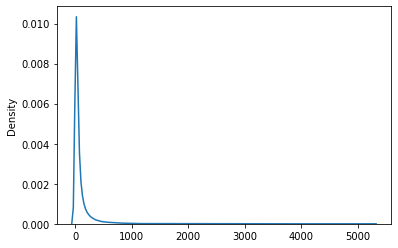

In [20]:
sns.kdeplot(vlist)